# US Housing Affordability

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
import datetime

In [2]:
# load the data as a df
housing_price_df = pd.read_csv('./Data/MEPAINUSA646N.csv')
income_df = pd.read_csv('./Data/MSPUS.csv')

In [3]:
# convert date columns to datetime types
housing_price_df['DATE'] = pd.to_datetime(housing_price_df.DATE)
income_df['DATE'] = pd.to_datetime(income_df.DATE)

In [4]:
# merge the datasets on the DATE column
housing_affordability_df = pd.merge(left = housing_price_df, right = income_df, on = 'DATE', how = 'inner')

In [5]:
# rename columns for interpretability
housing_affordability_df.rename(columns = {'DATE':'Date','MEPAINUSA646N':'Median Personal Income (current $)', 'MSPUS': 'Median Sales Price of Housing (current $)'}, inplace=True)

In [6]:
# Create a new column indicating the ratio of housing price to personal income
housing_affordability_df['Median home price / Median personal income'] = housing_affordability_df['Median Sales Price of Housing (current $)'] / housing_affordability_df['Median Personal Income (current $)']

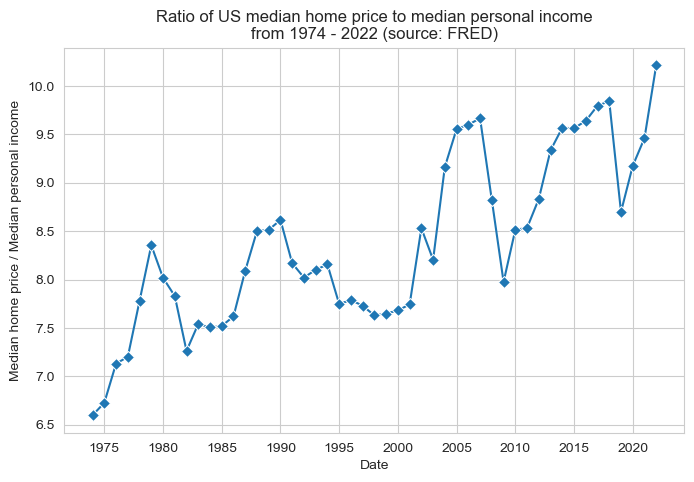

In [7]:
# plot this ratio as a lineplot
plt.figure(figsize = (8,5))
sns.set_style('whitegrid')
_ = sns.lineplot(data = housing_affordability_df, x = 'Date', y = 'Median home price / Median personal income', marker='D')
_.set_xticks(pd.date_range(start='1975-01-01', end='2022-01-01', freq='5YS'))
_.set_xticklabels(pd.date_range(start='1975-01-01', end='2022-01-01', freq='5YS').year)
plt.title('Ratio of US median home price to median personal income\nfrom 1974 - 2022 (source: FRED)')
plt.show()

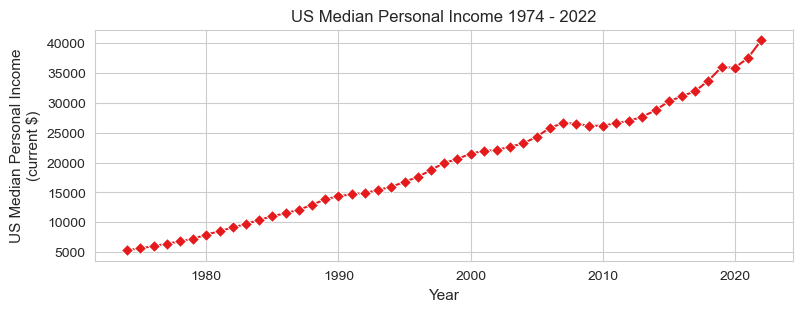

In [8]:
# plot income and housing price as lineplots. To do this, I have to convert the dataframe to a long format

# convert housing_affordability_df to a long format
housing_affordability_df_long = housing_affordability_df.melt(id_vars = 'Date')
housing_affordability_df_long = housing_affordability_df_long[housing_affordability_df_long['variable'] != 'Median home price / Median personal income']

# create a lineplot showing median personal income
plt.figure(figsize = (9,3))
_ = sns.lineplot(data = housing_affordability_df, x = 'Date', y = 'Median Personal Income (current $)', marker = 'D', color = '#E41A1C')
plt.xlabel('Year', fontsize = 11)
plt.ylabel('US Median Personal Income\n(current $)', fontsize = 11)
plt.title('US Median Personal Income 1974 - 2022')
plt.show()

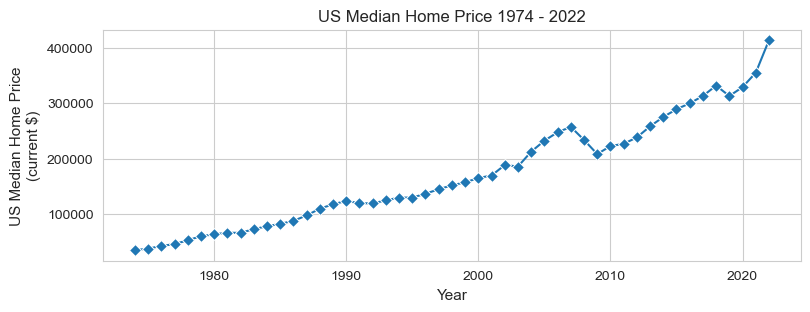

In [9]:
# create a lineplot showing median housing price
plt.figure(figsize = (9,3))
_ = sns.lineplot(data = housing_affordability_df, x = 'Date', y = 'Median Sales Price of Housing (current $)', marker = 'D')
plt.xlabel('Year', fontsize = 11)
plt.ylabel('US Median Home Price\n(current $)', fontsize = 11)
plt.title('US Median Home Price 1974 - 2022')
plt.show()

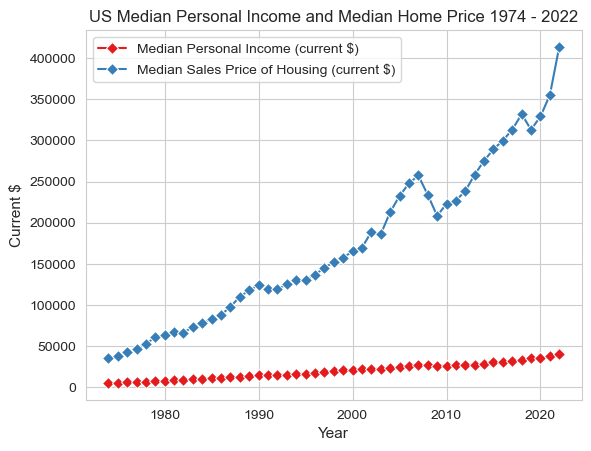

In [10]:
# create a lineplot showing both personal income and median housing price to highlight how each has changed over time
filtered_df = housing_affordability_df_long[(housing_affordability_df_long['variable'] == 'Median Personal Income (current $)') | (housing_affordability_df_long['variable'] == 'Median Sales Price of Housing (current $)')]
_ = sns.lineplot(data = filtered_df, x = 'Date', y = 'value', hue = 'variable', marker = 'D', palette = 'Set1')
plt.ylabel('Current $')
plt.title('US Median Personal Income and Median Home Price 1974 - 2022')
plt.xlabel('Year', fontsize = 11)
plt.ylabel('Current $', fontsize = 11)
plt.legend(title = '')
plt.show()

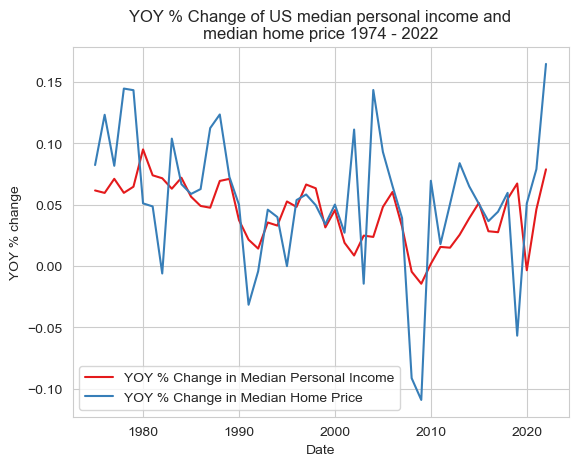

In [11]:
# Lets show the percentage change YOY for median personal income and median sales price of houses and create a lineplot for each
housing_affordability_df['YOY % Change in Median Personal Income'] = housing_affordability_df['Median Personal Income (current $)'].pct_change()
housing_affordability_df['YOY % Change in Median Home Price'] = housing_affordability_df['Median Sales Price of Housing (current $)'].pct_change()
housing_affordability_df_long = housing_affordability_df.melt(id_vars = 'Date')

_ = sns.lineplot(data = housing_affordability_df_long[(housing_affordability_df_long['variable'] == 'YOY % Change in Median Personal Income') | (housing_affordability_df_long['variable'] == 'YOY % Change in Median Home Price')], y = 'value', x = 'Date', hue = 'variable', palette = 'Set1')
plt.legend(title = '')
plt.ylabel('YOY % change')
plt.title('YOY % Change of US median personal income and\nmedian home price 1974 - 2022')
plt.show()